<a href="https://colab.research.google.com/github/kidstechlab/python_colab/blob/main/03_Intro_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Intro to AI - Object detection

## Overview
*  Learn fundamental AI in an accessible way.
*  Understand what object detection is and why it’s useful.
*  Run an AI object detection model (Yolo) to detect objects in a street scene (showing a car, person, and bike).
*  Visualize the detection results (bounding boxes, labels, confidence scores) in Google Colab



### Setup
Changing the Colab Runtime to T4 GPU

**Why Use a GPU?**

**Faster Computation:** Deep learning models like YOLO11n involve complex computations that are much faster on a GPU compared to a CPU.  

*  In your Google Colab notebook, click on the "Runtime" menu at the top.  

![](https://raw.githubusercontent.com/kidstechlab/python_colab/refs/heads/main/Change%20colab%20runtime.png)

*  Select "Change runtime type" from the dropdown.
In the pop-up window, locate the "Hardware accelerator" option and select "GPU" from the dropdown menu.
(Google Colab often provides a Tesla T4 GPU by default when you choose "GPU".)

![](https://raw.githubusercontent.com/kidstechlab/python_colab/refs/heads/main/T4%20GPU.png)

*  Click "Save" to apply the changes.

Your notebook is now set to use a GPU, which will speed up tasks for AI


## Introduction to AI & Machine Learning Concepts

### Key Concepts to Cover:

**What is AI?**
Artificial Intelligence (AI) is the field of computer science focused on creating systems that can perform tasks that typically require human intelligence. This includes understanding language, recognizing images, making decisions, and more.  

**Neural Networks:**
These are computer models inspired by the human brain. They consist of layers of interconnected “neurons” that work together to process information. In image detection, a neural network can learn to identify features such as edges, shapes, and colors.  

**Object Detection:**
Object detection is a task where the computer not only recognizes what is in an image but also tells you where it is by drawing a box around it. This is useful for tasks like identifying items in an image.

**You Only Look Once (YOLO)**
Yolo is a real-time object detection systems based on convolutional neural networks

### Installing YOLO by ultralytics

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
# Import libraries for image handling from the internet
import requests
from io import BytesIO
from PIL import Image

# Import other necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:

# Load the YOLO11 model (pre-trained on food data)
model = YOLO('yolo11n.pt')  # Ensure 'yolo11.pt' is in your Colab files or use a provided URL
print("YOLO11 model loaded successfully!")



100%|██████████| 5.35M/5.35M [00:00<00:00, 345MB/s]

YOLO11 model loaded successfully!


##  Loading an Image from a URL Using a Custom Function (10 minutes)  

### Instructions:

Create a function to load an image from an online URL. We’ll use an image that shows a city street with cars, people, and bikes.  

### Example Code:

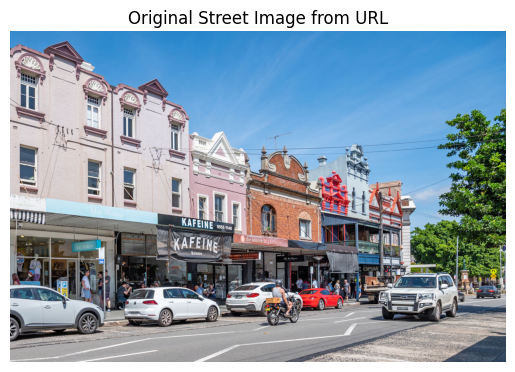

In [5]:
# Define a function to load an image from a URL with custom headers
def load_url_image(url, headers={"User-Agent": "AIBot/1.0"}):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        return img
    else:
        print("Failed to retrieve image. Status code:", response.status_code)
        return None

# URL of a sample street scene image (contains car, person, and bike)
image_url = "https://wikiaustralia.com/wp-content/uploads/2011/07/Getting-to-Balmain-by-car.jpg"

# Load the image using the custom function
img_pil = load_url_image(image_url)

# Convert the PIL image to a NumPy array (required for YOLO)
img_np = np.array(img_pil)

img_np
# Display the original image
plt.imshow(img_np)
plt.title("Original Street Image from URL")
plt.axis("off")
plt.show()


## Running YOLO11n Detection on the URL Image

### Example Code:


0: 448x640 9 persons, 7 cars, 1 motorcycle, 1 truck, 14.3ms
Speed: 3.3ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


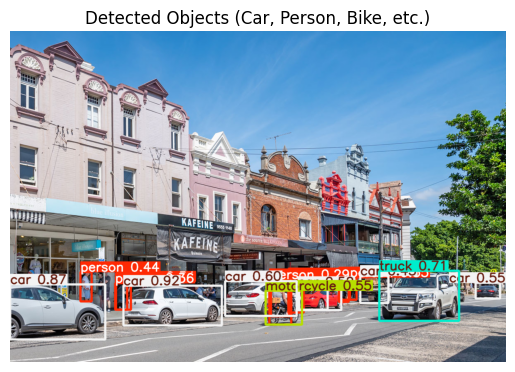

In [14]:
# Run YOLO11n detection on the image
results = model(img_np)

# Visualize detections using the built-in plot() method
detected_img = results[0].plot()  # Get the first result

# Display the detection results
plt.imshow(detected_img)
plt.title("Detected Objects (Car, Person, Bike, etc.)")
plt.axis("off")
plt.show()

Do the detected objects match what you see in the image?

Test with another image. Try changing the image url with another image.   
E.g. https://wikiaustralia.com/wp-content/uploads/2011/07/The-Rocks-in-Sydney.jpg

![](https://wikiaustralia.com/wp-content/uploads/2011/07/The-Rocks-in-Sydney.jpg)

### Example code:

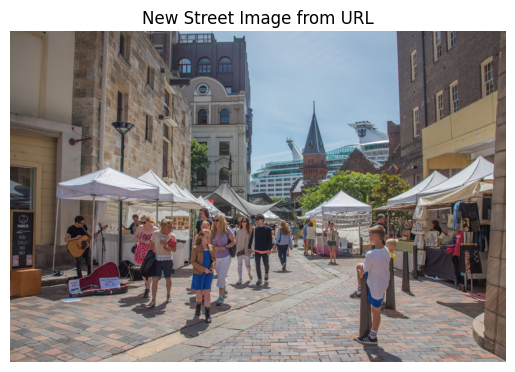


0: 448x640 12 persons, 17.7ms
Speed: 9.3ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


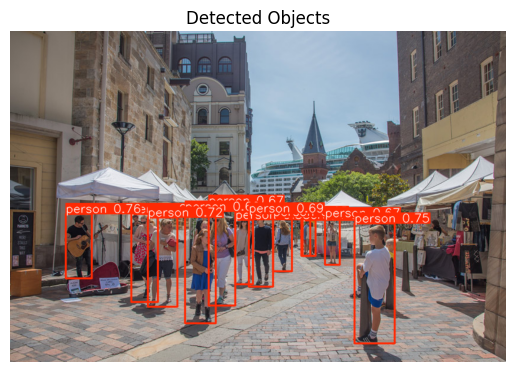

In [15]:
image_url = "https://wikiaustralia.com/wp-content/uploads/2011/07/The-Rocks-in-Sydney.jpg"

# Load the image using the custom function
img_pil = load_url_image(image_url)

# Convert the PIL image to a NumPy array (required for YOLO)
img_np = np.array(img_pil)

# Display the new image
plt.imshow(img_np)
plt.title("New Street Image from URL")
plt.axis("off")
plt.show()

# Run YOLO11n detection on the image
results = model(img_np)

# Visualize detections using the built-in plot() method
detected_img = results[0].plot()  # Get the first result

# Display the detection results
plt.imshow(detected_img)
plt.title("Detected Objects")
plt.axis("off")
plt.show()

## Modify the Detection Confidence Threshold

### Objective:
Explore how adjusting the detection confidence threshold affects the displayed detections.

### Instructions:

* Modify the YOLO detection code to only display detections with a confidence score above a specific threshold (e.g., 0.70).  

* Re-run the detection on the original image.


0: 448x640 12 persons, 14.7ms
Speed: 4.9ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 3 persons, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


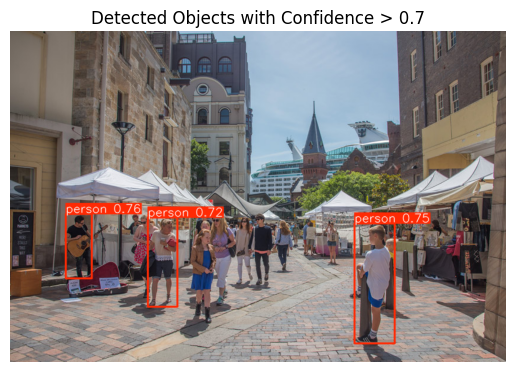

In [17]:
# Run YOLO11n detection on the image
results = model(img_np)

# Define the confidence threshold
confidence_threshold = 0.7

results = model(img_np, conf=confidence_threshold)
# Visualize detections using the built-in plot() method
# But only plot the boxes that have a confidence > 0.7
detected_img = results[0].plot()

# Display the detection results
plt.imshow(detected_img)
plt.title("Detected Objects with Confidence > 0.7")
plt.axis("off")
plt.show()



### Expected Outcome:
Notice that increasing the threshold results in fewer (but more certain) detections

## Run the object detection with a uploaded image



In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Programmer-Room-Setup.jpg to Programmer-Room-Setup (2).jpg
User uploaded file "Programmer-Room-Setup (2).jpg" with length 143023 bytes


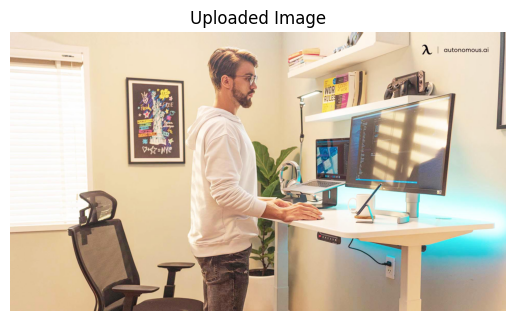


0: 384x640 1 person, 1 chair, 1 tv, 21.1ms
Speed: 4.1ms preprocess, 21.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


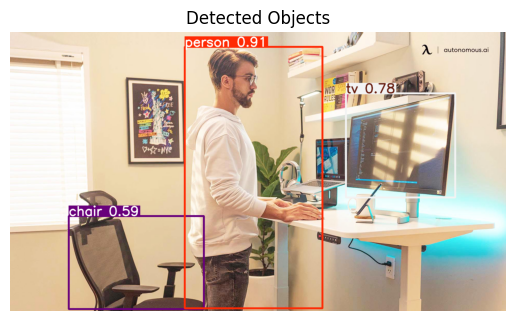

In [22]:
# Assuming the uploaded file is named 'image.jpg' (adjust if different)
img_path = list(uploaded.keys())[0]

# Load the image using PIL
img_pil = Image.open(BytesIO(uploaded[img_path]))

# Convert the PIL image to a NumPy array
img_np = np.array(img_pil)

# Display the uploaded image
plt.imshow(img_np)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

# Run YOLO detection on the uploaded image
results = model(img_np)

# Visualize detections
detected_img = results[0].plot()

# Display the detection results
plt.imshow(detected_img)
plt.title("Detected Objects")
plt.axis("off")
plt.show()


## Summary
*  **Change Runtime to GPU:** Ensure your Colab runtime is set to a T4 GPU (refer to Part 0) for faster processing.
*  **Experiment:** Try different image URLs and adjust parameters like the confidence threshold.
*  **Share** your findings with classmates and discuss how AI-powered object detection can change everyday life.

Happy coding, and enjoy exploring how AI helps us "see" common objects like cars, persons, and bikes in real-world scenes!